In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

np.random.seed(123)
tf.random.set_seed(123)

In [ ]:
# Data Exploration

In [ ]:
# https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones
# https://www.kaggle.com/erenaktas/human-activity-recognition
!wget -nc https://lazyprogrammer.me/course_files/timeseries/UCI-HAR.zip

--2025-11-16 20:50:04--  https://lazyprogrammer.me/course_files/timeseries/UCI-HAR.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2025-11-16 20:50:04 ERROR 403: Forbidden.



In [ ]:
!mkdir 'UCI HAR Dataset'

In [ ]:
!unzip -nq UCI-HAR.zip

[UCI-HAR.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of UCI-HAR.zip or
        UCI-HAR.zip.zip, and cannot find UCI-HAR.zip.ZIP, period.


In [32]:
!ls

 sample_data  'UCI HAR Dataset'


In [33]:
!ls 'UCI HAR Dataset'

activity_labels.txt  features_info.txt	features.txt  README.txt  test	train


In [34]:
!ls 'UCI HAR Dataset/train'

'Inertial Signals'   subject_train.txt	 X_train.txt   y_train.txt


In [35]:
!head 'UCI HAR Dataset/train/subject_train.txt'

1
1
1
1
1
1
1
1
1
1


In [36]:
def printUnique(file_path):
    uniqueSet = set()
    try:
        # Open the file in read mode ('r')
        with open(file_path, 'r') as file:
            # Iterate over each line in the file object
            for line_number, line in enumerate(file, 1):
                uniqueSet.add(int(line))
                # Process each line (e.g., print it, strip whitespace, etc.)
                # print(f"Line {line_number}: {line.strip()}")
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    print(uniqueSet)

In [37]:
printUnique('UCI HAR Dataset/train/subject_train.txt')

{1, 3, 5, 6, 7, 8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26, 27, 28, 29, 30}


In [38]:
!head 'UCI HAR Dataset/train/X_train.txt'

  2.8858451e-001 -2.0294171e-002 -1.3290514e-001 -9.9527860e-001 -9.8311061e-001 -9.1352645e-001 -9.9511208e-001 -9.8318457e-001 -9.2352702e-001 -9.3472378e-001 -5.6737807e-001 -7.4441253e-001  8.5294738e-001  6.8584458e-001  8.1426278e-001 -9.6552279e-001 -9.9994465e-001 -9.9986303e-001 -9.9461218e-001 -9.9423081e-001 -9.8761392e-001 -9.4321999e-001 -4.0774707e-001 -6.7933751e-001 -6.0212187e-001  9.2929351e-001 -8.5301114e-001  3.5990976e-001 -5.8526382e-002  2.5689154e-001 -2.2484763e-001  2.6410572e-001 -9.5245630e-002  2.7885143e-001 -4.6508457e-001  4.9193596e-001 -1.9088356e-001  3.7631389e-001  4.3512919e-001  6.6079033e-001  9.6339614e-001 -1.4083968e-001  1.1537494e-001 -9.8524969e-001 -9.8170843e-001 -8.7762497e-001 -9.8500137e-001 -9.8441622e-001 -8.9467735e-001  8.9205451e-001 -1.6126549e-001  1.2465977e-001  9.7743631e-001 -1.2321341e-001  5.6482734e-002 -3.7542596e-001  8.9946864e-001 -9.7090521e-001 -9.7551037e-001 -9.8432539e-001 -9.8884915e-001 -9.1774264e-001 -1.0000

In [39]:
def countValidTokensinLine(dir_name,trainOrTest):
  file_path = dir_name + trainOrTest + '.txt'
  uniqueSet = set()
  try:
    # Open the file in read mode ('r')
    with open(file_path, 'r') as file:
      # Iterate over each line in the file object
      for line_number, line in enumerate(file, 1):
        lineList = line.strip().split(' ')
        uniqueSet.add(len(lineList)-lineList.count(''))
        # Process each line (e.g., print it, strip whitespace, etc.)
        # print(f"Line {line_number}: {line.strip()}")
  except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
  except Exception as e:
    print(f"An error occurred: {e}")
  print(uniqueSet)

In [40]:
countValidTokensinLine('UCI HAR Dataset/train/X_','train')

{561}


In [41]:
!head 'UCI HAR Dataset/train/y_train.txt'

5
5
5
5
5
5
5
5
5
5


In [42]:
printUnique('UCI HAR Dataset/train/y_train.txt')

{1, 2, 3, 4, 5, 6}


In [43]:
!ls 'UCI HAR Dataset/train/Inertial Signals'

body_acc_x_train.txt  body_gyro_x_train.txt  total_acc_x_train.txt
body_acc_y_train.txt  body_gyro_y_train.txt  total_acc_y_train.txt
body_acc_z_train.txt  body_gyro_z_train.txt  total_acc_z_train.txt


In [44]:
countValidTokensinLine('UCI HAR Dataset/train/Inertial Signals/body_acc_x_','train')
countValidTokensinLine('UCI HAR Dataset/train/Inertial Signals/body_acc_y_','train')
countValidTokensinLine('UCI HAR Dataset/train/Inertial Signals/body_acc_z_','train')
countValidTokensinLine('UCI HAR Dataset/train/Inertial Signals/body_gyro_x_','train')
countValidTokensinLine('UCI HAR Dataset/train/Inertial Signals/body_gyro_y_','train')
countValidTokensinLine('UCI HAR Dataset/train/Inertial Signals/body_gyro_z_','train')
countValidTokensinLine('UCI HAR Dataset/train/Inertial Signals/total_acc_x_','train')
countValidTokensinLine('UCI HAR Dataset/train/Inertial Signals/total_acc_y_','train')
countValidTokensinLine('UCI HAR Dataset/train/Inertial Signals/total_acc_z_','train')



{128}
{128}
{128}
{128}
{128}
{128}
{128}
{128}
{128}


In [45]:
# Data is 9-dimensional. Each dimension of data has 128 time points
!ls 'UCI HAR Dataset/test/Inertial Signals'

body_acc_x_test.txt  body_gyro_x_test.txt  total_acc_x_test.txt
body_acc_y_test.txt  body_gyro_y_test.txt  total_acc_y_test.txt
body_acc_z_test.txt  body_gyro_z_test.txt  total_acc_z_test.txt


In [46]:
countValidTokensinLine('UCI HAR Dataset/test/Inertial Signals/body_acc_x_','test')
countValidTokensinLine('UCI HAR Dataset/test/Inertial Signals/body_acc_y_','test')
countValidTokensinLine('UCI HAR Dataset/test/Inertial Signals/body_acc_z_','test')
countValidTokensinLine('UCI HAR Dataset/test/Inertial Signals/body_gyro_x_','test')
countValidTokensinLine('UCI HAR Dataset/test/Inertial Signals/body_gyro_y_','test')
countValidTokensinLine('UCI HAR Dataset/test/Inertial Signals/body_gyro_z_','test')
countValidTokensinLine('UCI HAR Dataset/test/Inertial Signals/total_acc_x_','test')
countValidTokensinLine('UCI HAR Dataset/test/Inertial Signals/total_acc_y_','test')
countValidTokensinLine('UCI HAR Dataset/test/Inertial Signals/total_acc_z_','test')

{128}
{128}
{128}
{128}
{128}
{128}
{128}
{128}
{128}


In [47]:
!head 'UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt'

  1.8085150e-004  1.0138560e-002  9.2755740e-003  5.0658970e-003  1.0810250e-002  4.0451010e-003  4.7573750e-003  6.2136470e-003  3.3067440e-003  7.5719410e-003  5.4071170e-003  6.2212760e-003  6.8950280e-003  4.6102600e-003  7.3313330e-003  5.0776670e-003  5.7625560e-003  6.6927480e-003  5.4432380e-003  8.2409520e-003  6.5064510e-003  6.5315230e-003  7.4224410e-003  5.7717690e-003  6.2401870e-003  4.6229820e-003  4.8329620e-003  5.4987460e-003  4.3411860e-003  5.0980180e-003  4.2687420e-003  3.0451870e-003  3.2041920e-003  4.5204000e-003  5.1272110e-003  3.5497910e-003  4.2342330e-003  4.4686700e-003  3.5727020e-003  5.1362780e-003  5.3797860e-003  4.4085200e-003  2.2440390e-003 -1.1835980e-003 -6.7953420e-004  2.2813890e-003  3.6537280e-003  2.3126390e-003 -4.0421940e-005  5.3422540e-004  2.9632630e-003  4.3994680e-003  2.7023390e-003  3.4523100e-004  2.9169110e-003  4.9785560e-003  3.4468700e-003  4.3781510e-003  5.0061700e-003  1.9967950e-003 -4.7185960e-004 -7.5556790e-004 -1.5281

In [48]:
df = pd.read_csv(
    'UCI HAR Dataset/train/Inertial Signals/body_acc_x_train.txt',
    header=None,
    delim_whitespace=True,
)

/tmp/ipython-input-1398892278.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


In [49]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.000181,0.010139,0.009276,0.005066,0.010810,0.004045,0.004757,0.006214,0.003307,0.007572,...,0.001412,-0.001509,0.000060,0.000435,-0.000819,0.000228,-0.000300,-0.001147,-0.000222,0.001576
1,0.001094,0.004550,0.002879,0.002247,0.003305,0.002416,0.001619,0.000981,0.000009,-0.000363,...,-0.000104,-0.000141,0.001333,0.001541,0.001077,-0.000736,-0.003767,-0.004646,-0.002941,-0.001599
2,0.003531,0.002285,-0.000420,-0.003738,-0.006706,-0.003148,0.000733,0.000668,0.002162,-0.000946,...,0.000661,0.001853,-0.000268,-0.000394,-0.000279,-0.000316,0.000144,0.001246,0.003117,0.002178
3,-0.001772,-0.001311,0.000388,0.000408,-0.000355,0.000998,0.001109,-0.003149,-0.008882,-0.010483,...,0.000458,0.002103,0.001358,0.000820,-0.000212,-0.001915,-0.001631,-0.000867,-0.001172,-0.000028
4,0.000087,-0.000272,0.001022,0.003126,0.002284,0.000885,0.001933,0.002270,0.002247,0.002175,...,0.002529,0.003518,-0.000248,-0.002761,0.000252,0.003752,0.001626,-0.000698,-0.001223,-0.003328


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 128 entries, 0 to 127
dtypes: float64(128)
memory usage: 7.2 MB


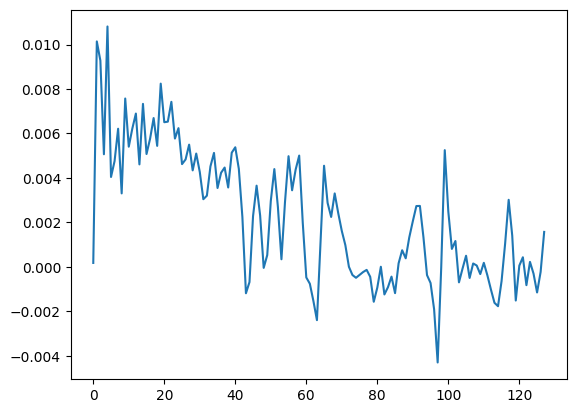

In [51]:
df.iloc[0].plot();

In [52]:
# Obtain these by inspecting the files. We got this by doing df.info()
T = 128 # each dimension of data has 128 TIME POINTS
Ntrain = 7352
Ntest = 2947
D = 9 # since there are 9 files,i.e., the data is 9-dimensional
K = 6 # number of classes (1-6)

In [53]:
def load_data():
  # Returns:
  # Xtrain (Ntrain x T x D), Ytrain (Ntrain) # we use length T time series of each of D dimensions to predict each Ytrain
  # Xtest (Ntest x T x D), Ytest (Ntest)

  Xtrain = np.zeros((Ntrain, T, D))
  Xtest = np.zeros((Ntest, T, D))

  # train data These are our D dimensions each row of which has T (=128) time points
  ts_filenames = [
    'body_acc_x_train.txt', 'body_gyro_x_train.txt', 'total_acc_x_train.txt',
    'body_acc_y_train.txt', 'body_gyro_y_train.txt', 'total_acc_y_train.txt',
    'body_acc_z_train.txt', 'body_gyro_z_train.txt', 'total_acc_z_train.txt',
  ]

  ts_file_prefix = 'UCI HAR Dataset/train/'

  for d, fn in enumerate(ts_filenames):
    df = pd.read_csv(
        f'{ts_file_prefix}Inertial Signals/{fn}',
        header=None,
        delim_whitespace=True)

    # Ntrain x T array
    x = df.to_numpy()
    Xtrain[:, :, d] = x # indexing NxT data to corresponding dimension number

  # train labels
  Ytrain = pd.read_csv(
      f'{ts_file_prefix}y_train.txt', header=None).to_numpy() - 1
  Ytrain = Ytrain.flatten()

  # test data
  ts_filenames = [
    'body_acc_x_test.txt', 'body_gyro_x_test.txt', 'total_acc_x_test.txt',
    'body_acc_y_test.txt', 'body_gyro_y_test.txt', 'total_acc_y_test.txt',
    'body_acc_z_test.txt', 'body_gyro_z_test.txt', 'total_acc_z_test.txt',
  ]

  ts_file_prefix = 'UCI HAR Dataset/test/'

  for d, fn in enumerate(ts_filenames):
    df = pd.read_csv(
        f'{ts_file_prefix}Inertial Signals/{fn}',
        header=None,
        delim_whitespace=True)

    # Ntrain x T array
    x = df.to_numpy()
    Xtest[:, :, d] = x

  # test labels
  Ytest = pd.read_csv(
      f'{ts_file_prefix}y_test.txt', header=None).to_numpy() - 1
  Ytest = Ytest.flatten()

  return Xtrain, Ytrain, Xtest, Ytest

In [54]:
Xtrain, Ytrain, Xtest, Ytest = load_data()

/tmp/ipython-input-1478560542.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(
/tmp/ipython-input-1478560542.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(
/tmp/ipython-input-1478560542.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(
/tmp/ipython-input-1478560542.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(
/tmp/ipython-input-1478560542.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(
/tmp/

In [55]:
print("Xtrain shape: ", Xtrain.shape) # Shape is N x T x D
print("Ytrain shape: ", Ytrain.shape) # Shape is N
print("Xtest shape: ", Xtest.shape)
print("Ytest shape: ", Ytest.shape)

Xtrain shape:  (7352, 128, 9)
Ytrain shape:  (7352,)
Xtest shape:  (2947, 128, 9)
Ytest shape:  (2947,)


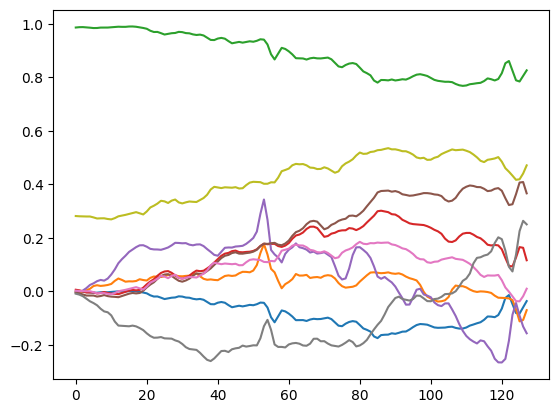

In [56]:
# plot all D=9 time series of length T=128
plt.plot(Xtrain[7000, :, :]); # we choose 7000th sample and plot its 128 time points for each of D = 9 dimensions

In [59]:
# ANN
inputs = [] # D x T
features = [] # D x (size of individual ANN output)

# make a neural network for each of the D time series
for d in range(D):
  i = Input(shape=(T,))
  x = Dense(32, activation='relu')(i)
  x = Dense(16, activation='relu')(x)
  inputs.append(i)
  features.append(x)

# output of concatenate will be D * (size of individual ANN output)
x = Concatenate()(features)
x = Dense(K)(x) # at this stage we used concatenated features to get K (= 6) dimensional output.
model = Model(inputs, x)

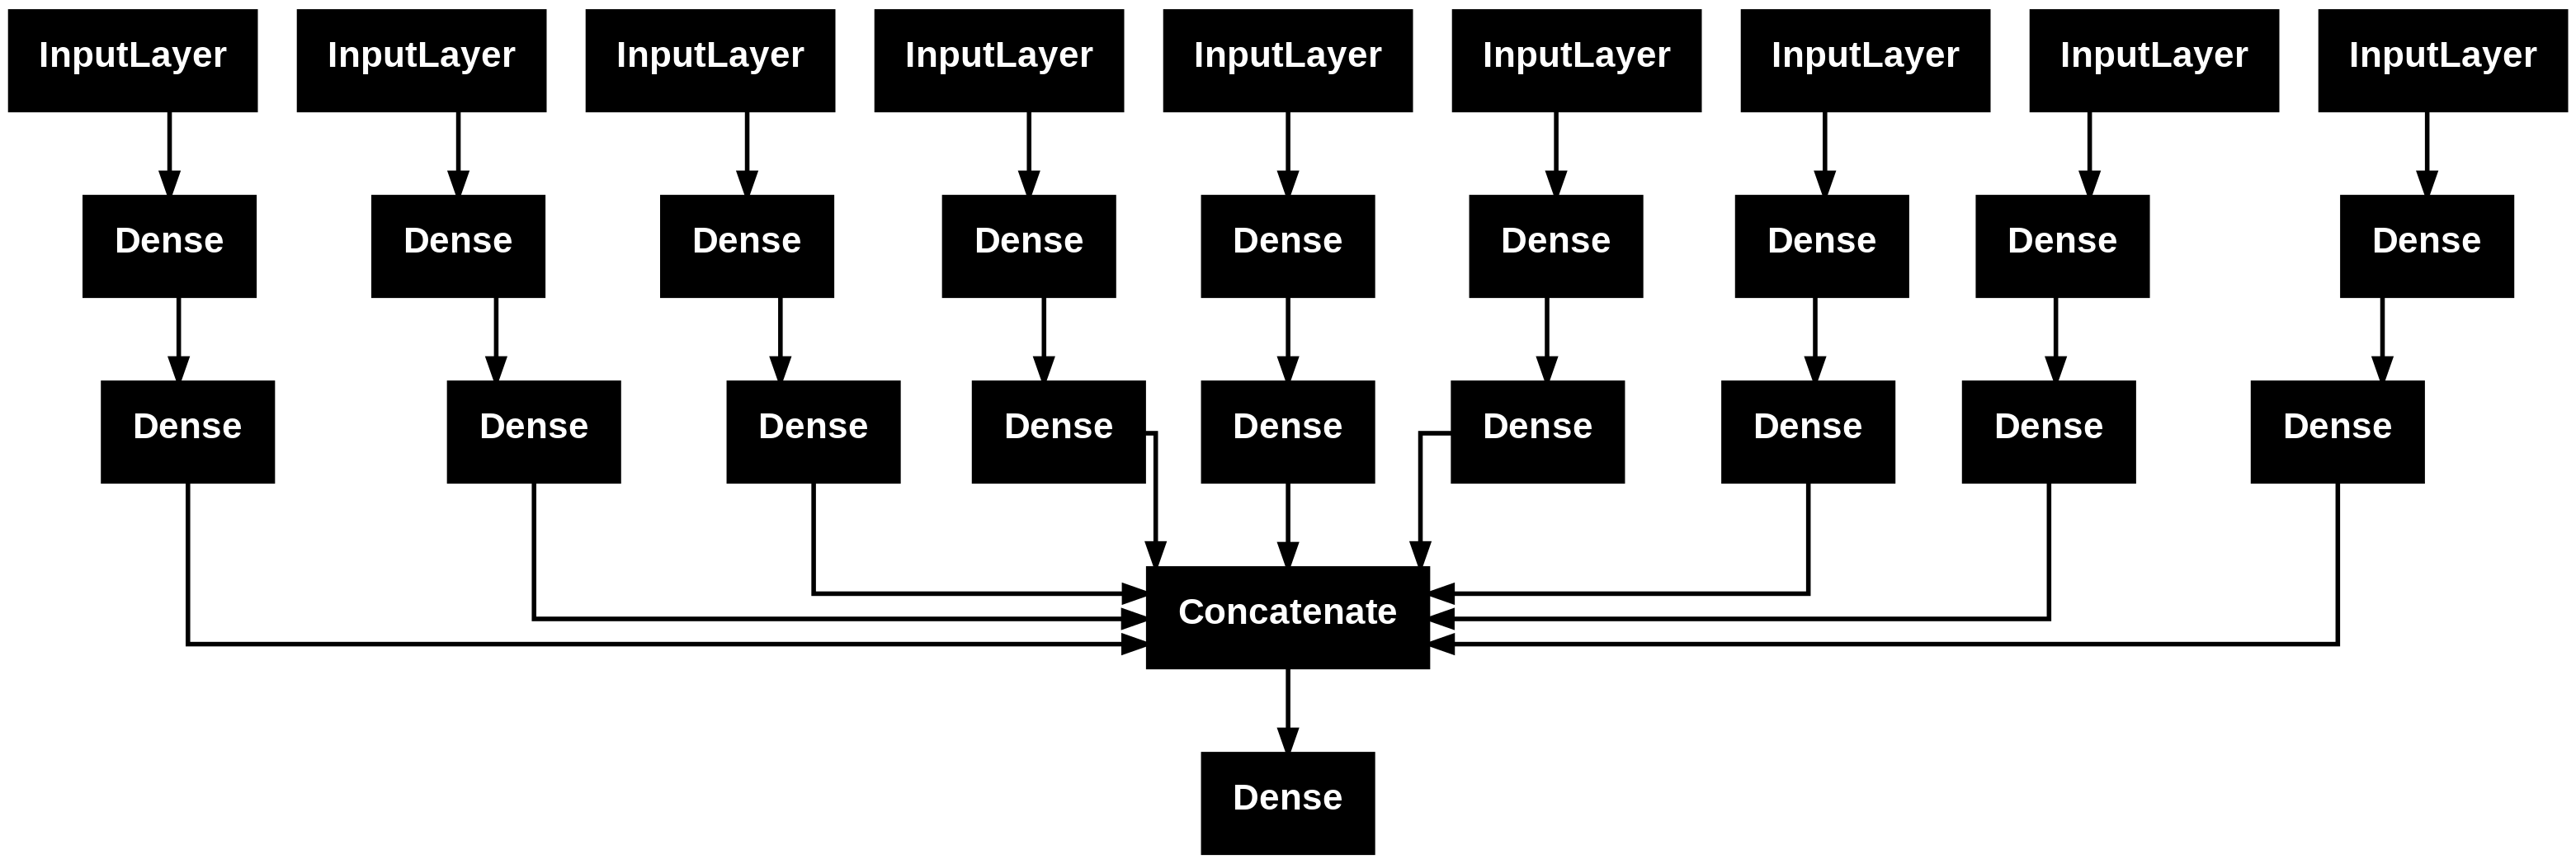

In [60]:
tf.keras.utils.plot_model(model)

In [61]:
check_point = ModelCheckpoint(
    'best_model.h5', monitor='val_accuracy', save_best_only=True)

In [62]:
model.compile(
  loss=SparseCategoricalCrossentropy(from_logits=True),# from_logits is true because we didn't exponentiate output for numerical stability
  optimizer='adam',
  metrics=['accuracy'],
)

In [63]:
Xtrain_split = []
Xtest_split = []
for d in range(D):
  Xtrain_split.append(Xtrain[:, :, d])
  Xtest_split.append(Xtest[:, :, d])

In [64]:
np.array(Xtrain_split).shape # Xtrain_split is D x N x T, i.e. it is list of D matrices of size N x T

(9, 7352, 128)

In [65]:
r = model.fit(
  Xtrain_split,
  Ytrain,
  epochs=15,
  callbacks=[check_point],
  validation_data=(Xtest_split, Ytest),
)

Epoch 1/15
219/230 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6609 - loss: 0.9476

230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6680 - loss: 0.9292 - val_accuracy: 0.8354 - val_loss: 0.4290
Epoch 2/15
226/230 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9239 - loss: 0.2338

230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9239 - loss: 0.2336 - val_accuracy: 0.8677 - val_loss: 0.3392
Epoch 3/15
220/230 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9465 - loss: 0.1614

230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9463 - loss: 0.1614 - val_accuracy: 0.8795 - val_loss: 0.3046
Epoch 4/15
227/230 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9548 - loss: 0.1304

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9547 - loss: 0.1305 - val_accuracy: 0.8863 - val_loss: 0.2857
Epoch 5/15
226/230 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9597 - loss: 0.1130

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9597 - loss: 0.1131 - val_accuracy: 0.8972 - val_loss: 0.2748
Epoch 6/15
228/230 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9629 - loss: 0.1023

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9629 - loss: 0.1024 - val_accuracy: 0.9019 - val_loss: 0.2650
Epoch 7/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9654 - loss: 0.0948

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9654 - loss: 0.0949 - val_accuracy: 0.9030 - val_loss: 0.2634
Epoch 8/15
220/230 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9676 - loss: 0.0885

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9675 - loss: 0.0887 - val_accuracy: 0.9057 - val_loss: 0.2610
Epoch 9/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9690 - loss: 0.0833 - val_accuracy: 0.9053 - val_loss: 0.2570
Epoch 10/15
227/230 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9709 - loss: 0.0786

230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9708 - loss: 0.0787 - val_accuracy: 0.9074 - val_loss: 0.2546
Epoch 11/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9725 - loss: 0.0743

230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9725 - loss: 0.0743 - val_accuracy: 0.9077 - val_loss: 0.2530
Epoch 12/15
229/230 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9740 - loss: 0.0696

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9740 - loss: 0.0696 - val_accuracy: 0.9097 - val_loss: 0.2500
Epoch 13/15
224/230 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9758 - loss: 0.0654

230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9758 - loss: 0.0654 - val_accuracy: 0.9125 - val_loss: 0.2480
Epoch 14/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9776 - loss: 0.0612 - val_accuracy: 0.9118 - val_loss: 0.2516
Epoch 15/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9787 - loss: 0.0575 - val_accuracy: 0.9111 - val_loss: 0.2524


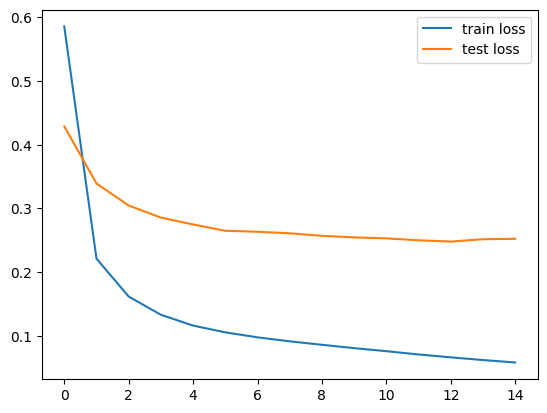

In [66]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

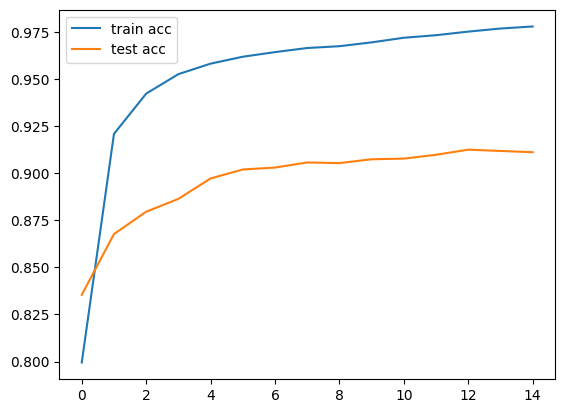

In [67]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend();

In [68]:
# load best model
best_model = tf.keras.models.load_model('best_model.h5')

In [69]:
# make predictions
Ptest = best_model.predict(Xtest_split)

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [70]:
np.array(Ptest).shape

(2947, 6)

In [71]:
# evaluate
np.mean(np.argmax(Ptest, axis=1) == Ytest)

np.float64(0.9124533423820834)

In [72]:
from sklearn.preprocessing import StandardScaler

def load_features():
  # Returns:
  # X_train (Ntrain x D)
  # X_test (Ntest x D)

  # train data
  df = pd.read_csv(
        'UCI HAR Dataset/train/X_train.txt',
        header=None,
        delim_whitespace=True)

  feat_train = df.to_numpy()

  # test data
  df = pd.read_csv(
        'UCI HAR Dataset/test/X_test.txt',
        header=None,
        delim_whitespace=True)

  feat_test = df.to_numpy()

  scaler = StandardScaler()
  feat_train = scaler.fit_transform(feat_train)
  feat_test = scaler.transform(feat_test)

  return feat_train, feat_test

In [73]:
feat_train, feat_test = load_features()

/tmp/ipython-input-3389213826.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(
/tmp/ipython-input-3389213826.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(


In [74]:
D_feat = feat_train.shape[1]

In [75]:
# Basic ANN
i = Input(shape=(D_feat,))
x = Dense(32, activation='relu')(i)
x = Dense(K)(x)
model = Model(i, x)

In [76]:
model.compile(
  loss=SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy'],
)

In [77]:
check_point2 = ModelCheckpoint(
    'best_model_basic.h5', monitor='val_accuracy', save_best_only=True)

In [78]:
r = model.fit(
  feat_train,
  Ytrain,
  epochs=15,
  callbacks=[check_point2],
  validation_data=(feat_test, Ytest),
)

Epoch 1/15
224/230 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7516 - loss: 0.6546

230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7555 - loss: 0.6450 - val_accuracy: 0.9335 - val_loss: 0.1976
Epoch 2/15
218/230 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9652 - loss: 0.1139

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9654 - loss: 0.1133 - val_accuracy: 0.9338 - val_loss: 0.1788
Epoch 3/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9741 - loss: 0.0755 - val_accuracy: 0.9325 - val_loss: 0.1806
Epoch 4/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9789 - loss: 0.0609 - val_accuracy: 0.9321 - val_loss: 0.1867
Epoch 5/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9807 - loss: 0.0529 - val_accuracy: 0.9301 - val_loss: 0.1982
Epoch 6/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9829 - loss: 0.0478 - val_accuracy: 0.9281 - val_loss: 0.2064
Epoch 7/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9843 - loss: 0.0435 - val_accuracy: 0.9270 - val_loss: 0.2192
Epoch 8/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9859 - loss: 0.0399 - val_accuracy: 0.9270 - val_loss: 0.2307
Epoch 9/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9865 - loss: 0.0364 - val_accuracy: 0.9281 - val_

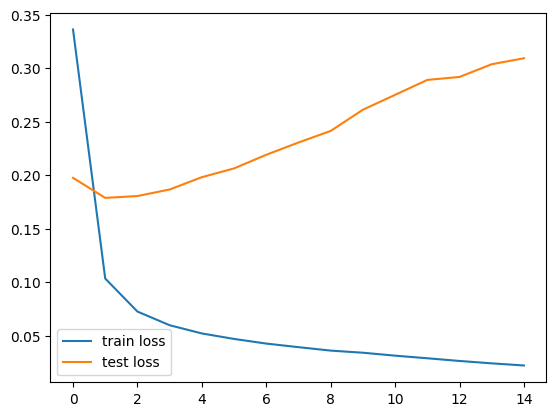

In [79]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

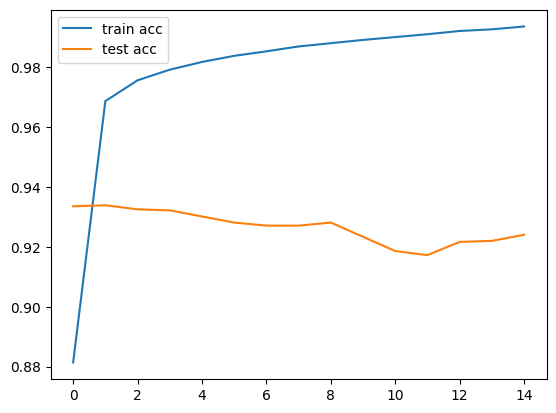

In [80]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend();

In [81]:
# load best model
best_model = tf.keras.models.load_model('best_model_basic.h5')

In [82]:
# make predictions
Ptest = best_model.predict(feat_test)

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [83]:
# evaluate
np.mean(np.argmax(Ptest, axis=1) == Ytest)

np.float64(0.9338310145911096)

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [85]:
model = LogisticRegression(
    solver='liblinear',
)
model.fit(feat_train, Ytrain)
model.score(feat_train, Ytrain)

0.9945593035908596

In [93]:
model.score(feat_test, Ytest)

0.9613165931455717

In [94]:
model = SVC()
model.fit(feat_train, Ytrain)
model.score(feat_train, Ytrain)

0.9866702937976061

In [95]:
model.score(feat_test, Ytest)

0.9521547336274178

In [96]:
# model = SVC(kernel='linear')
model = LinearSVC()
model.fit(feat_train, Ytrain)
model.score(feat_train, Ytrain)

0.9975516866158868

In [98]:
model.score(feat_test, Ytest) # Support Vector Machine with Linear Kernel performs the best

0.9626739056667798

In [99]:
model = RandomForestClassifier()
model.fit(feat_train, Ytrain)
model.score(feat_train, Ytrain)

1.0

In [100]:
model.score(feat_test, Ytest)

0.9321343739395996

In [101]:
# Combined Model
inputs = []
features = []

# make a neural network for each of the D time series
for d in range(D):
  i = Input(shape=(T,))
  x = Dense(32, activation='relu')(i)
  x = Dense(16, activation='relu')(x)
  inputs.append(i)
  features.append(x)

i2 = Input(shape=(D_feat,))
x2 = Dense(32, activation='relu')(i2)
# output of concatenate will be D * (size of individual ANN output)
x = Concatenate()(features + [x2]) # This is now a flattened series of length D*16+32 = 9*16+32 = 176
x = Dense(K)(x)
model = Model(inputs + [i2], x)

In [102]:
model.compile(
  loss=SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy'],
)

In [103]:
check_point3 = ModelCheckpoint(
    'best_model_combined.h5', monitor='val_accuracy', save_best_only=True)

In [104]:
r = model.fit(
  Xtrain_split + [feat_train],
  Ytrain,
  epochs=15,
  callbacks=[check_point3],
  validation_data=(Xtest_split + [feat_test], Ytest),
)

Epoch 1/15
224/230 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8202 - loss: 0.5040

230/230 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8229 - loss: 0.4969 - val_accuracy: 0.9206 - val_loss: 0.2173
Epoch 2/15
221/230 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9703 - loss: 0.0909

230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9703 - loss: 0.0908 - val_accuracy: 0.9318 - val_loss: 0.1836
Epoch 3/15
221/230 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9773 - loss: 0.0632

230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9773 - loss: 0.0632 - val_accuracy: 0.9382 - val_loss: 0.1698
Epoch 4/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9793 - loss: 0.0534 - val_accuracy: 0.9382 - val_loss: 0.1730
Epoch 5/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9813 - loss: 0.0462 - val_accuracy: 0.9379 - val_loss: 0.1779
Epoch 6/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9841 - loss: 0.0415 - val_accuracy: 0.9382 - val_loss: 0.1797
Epoch 7/15
224/230 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9846 - loss: 0.0374

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9846 - loss: 0.0375 - val_accuracy: 0.9450 - val_loss: 0.1697
Epoch 8/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9849 - loss: 0.0377 - val_accuracy: 0.9308 - val_loss: 0.2072
Epoch 9/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9897 - loss: 0.0297 - val_accuracy: 0.9332 - val_loss: 0.2110
Epoch 10/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9904 - loss: 0.0266 - val_accuracy: 0.9335 - val_loss: 0.2166
Epoch 11/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9912 - loss: 0.0240 - val_accuracy: 0.9304 - val_loss: 0.2270
Epoch 12/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9920 - loss: 0.0218 - val_accuracy: 0.9311 - val_loss: 0.2270
Epoch 13/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9933 - loss: 0.0199 - val_accuracy: 0.9355 - val_loss: 0.2183
Epoch 14/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9943 - loss: 0.0181 - val_accuracy: 0.9416 

230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9942 - loss: 0.0167 - val_accuracy: 0.9501 - val_loss: 0.1779


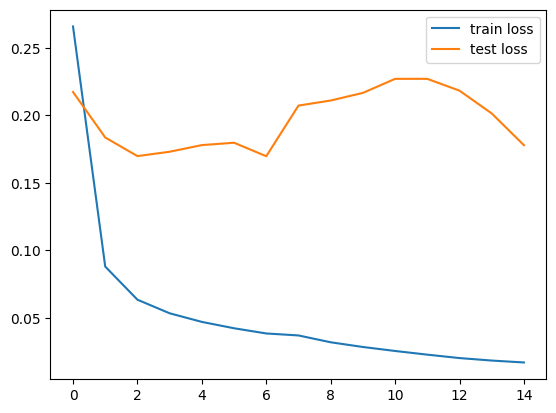

In [105]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

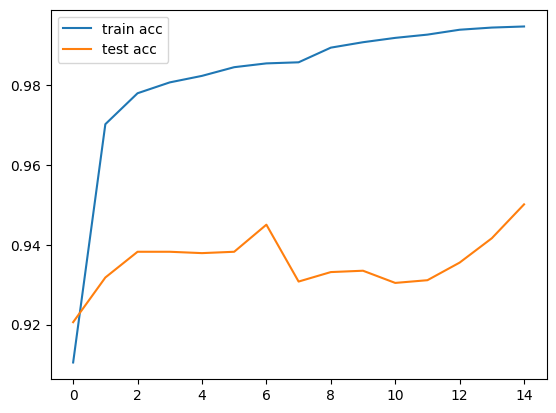

In [106]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='test acc')
plt.legend();

In [107]:
# load best model
best_model = tf.keras.models.load_model('best_model_combined.h5')

In [108]:
# make predictions
Ptest = best_model.predict(Xtest_split + [feat_test])

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [109]:
# evaluate
np.mean(np.argmax(Ptest, axis=1) == Ytest)
# ANN on combination of raw time series and feature vectors performs better than both ANN only on raw time series and ANN only on
# feature vectors. However it still underperforms the SUPPORT VECTOR MACHINE with LINEAR KERNEL applied on feature vectors

np.float64(0.9501187648456056)